In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 10:47:42 AM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Create parameters

In [2]:
params, R = ob.ra_params(num_resources=50, num_agents=50, num_participants=500)

# Distributed solution with limited memory $m$

In [3]:
agents = ob.ra_agents(params=params)
g = ob.ra_coupling(agents, R)
prob = ob.Problem(agents = agents, g = g)

In [4]:
max_iter = 50
memory = [20, 30, max_iter]
memory_bounds = {}
for m in memory:
    prob.solve(rel_gap= 10**(-10), abs_gap=10**(-10), max_iter=max_iter, memory=m)
    memory_bounds[m] = {'uk':prob.upper_bnd, 'lk':prob.lower_bnd}

/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/cvxpy-1.3.0-py3.10-macosx-10.9-x86_64.egg/cvxpy/problems/problem.py:1358: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


k=0, rel_gap=219.6427833193222, L=-805020.2987699432, U=-3648.523131639836
k=1, rel_gap=0.19883760640508655, L=-4373.986738048691, U=-3648.523131639836
k=2, rel_gap=0.09776414367415734, L=-4362.67306764873, U=-3974.1442574787498
k=3, rel_gap=0.060368710865541984, L=-4357.662265767884, U=-4109.572661957251
k=4, rel_gap=0.04698957488132808, L=-4354.158475120124, U=-4158.741003332006
k=5, rel_gap=0.042611622261664095, L=-4352.181157795511, U=-4174.307157975691
k=6, rel_gap=0.040780056934842684, L=-4349.612801388475, U=-4179.185383507766
k=7, rel_gap=0.039532110729203956, L=-4346.701447973693, U=-4181.401808670054
k=8, rel_gap=0.03770884014335917, L=-4339.077621048346, U=-4181.401808670054
k=9, rel_gap=0.03682087161469701, L=-4336.705962305963, U=-4182.695469422965
k=10, rel_gap=0.03475469786645295, L=-4328.063786730142, U=-4182.695469422965
k=11, rel_gap=0.03333816512260863, L=-4325.199454233858, U=-4185.657319373915
k=12, rel_gap=0.032293178659689566, L=-4322.046093187399, U=-4186.839729

k=6, rel_gap=0.04056225323173958, L=-4348.9936735119845, U=-4179.465149735195
k=7, rel_gap=0.03744526220077138, L=-4337.85378192111, U=-4181.284487934388
k=8, rel_gap=0.0348286668932049, L=-4331.592588202449, U=-4185.80652699436
k=9, rel_gap=0.03397031130331672, L=-4327.999677771813, U=-4185.80652699436
k=10, rel_gap=0.03247591500800118, L=-4321.744424004965, U=-4185.80652699436
k=11, rel_gap=0.03131423134810808, L=-4317.9337538786385, U=-4186.826500235863
k=12, rel_gap=0.02994563421802053, L=-4315.18029063154, U=-4189.716570727359
k=13, rel_gap=0.028606309945179327, L=-4311.860638884492, U=-4191.944573151896
k=14, rel_gap=0.027133972575345656, L=-4305.688682237169, U=-4191.944573151896
k=15, rel_gap=0.02619972842016293, L=-4302.595717189272, U=-4192.746887404784
k=16, rel_gap=0.02414920536071537, L=-4299.758625494049, U=-4198.37129491267
k=17, rel_gap=0.023423611057005387, L=-4296.712311197601, U=-4198.37129491267
k=18, rel_gap=0.021943658984860993, L=-4294.895021830494, U=-4202.67299

# Centralized solution

In [5]:
h_cvx = ob.cvx_resource_allocation(params=params, R=R)[0]

# Plot

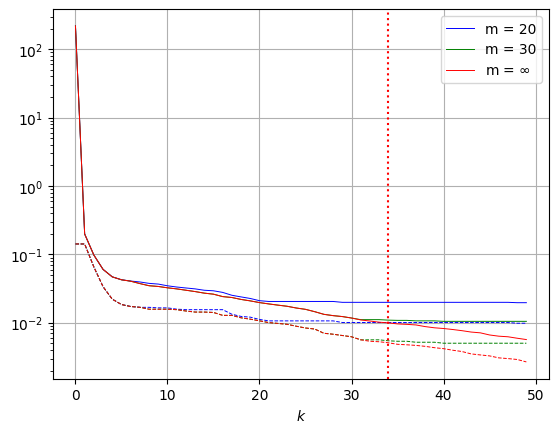

In [6]:
ob.plot_finite_memory(memory_bounds=memory_bounds, memory=memory, h_true=h_cvx)